Text(0, 0.5, 'y coordinates (m)')

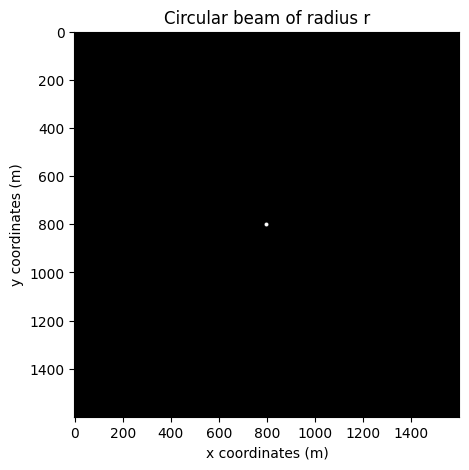

In [72]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft2, ifft2, fftfreq, fftshift
import math

wvl = 500e-9 # wavelength
f = 10 # distance
pix_size = 1e-6 # pixel size
img_size = 1e-3 # image size
num_pixels = 1600 # number of pixels

x = np.linspace(-img_size/2, img_size/2, num_pixels) # spatial grid size
xv, yv = np.meshgrid(x,x)

# defines object to be Gaussian beam
# un-comment this, and comment next part to see results

#u_in = np.exp(-2*(xv**2 + yv**2)/(img_size/120)**2)

# defines object to be perfect circle beam with radius r
r = 5e-6
u_in = (xv**2 < r**2 - yv**2)
u_in = u_in.astype(float)

# plotting the object
plt.figure(figsize = (5,5))
plt.imshow(u_in, cmap = 'gray')
plt.title("Circular beam of radius r")
plt.xlabel("x coordinates (m)")
plt.ylabel("y coordinates (m)")


Text(0, 0.5, 'y coordinates (mm)')

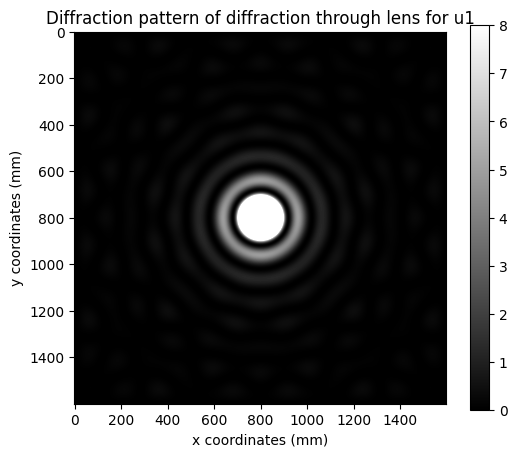

In [70]:
# plotting the intensity for u1

u1_fft = ifft2(u_in) 
u1 = fftshift(u1_fft) # Fourier transforming it and moving frequencies into suitable region

I1 = (1/(wvl*f))**2*np.abs(u1)**2 # calculating intensity using formula described in notes below
plt.figure(figsize=(6,5))
plt.imshow(I1, cmap='grey') # plotting intensity

plt.clim(0, 8) # sets limit for colorbar
plt.colorbar()

plt.title("Diffraction pattern of diffraction through lens for u1")
plt.xlabel("x coordinates (mm)")
plt.ylabel("y coordinates (mm)")



Text(0, 0.5, 'Intensity')

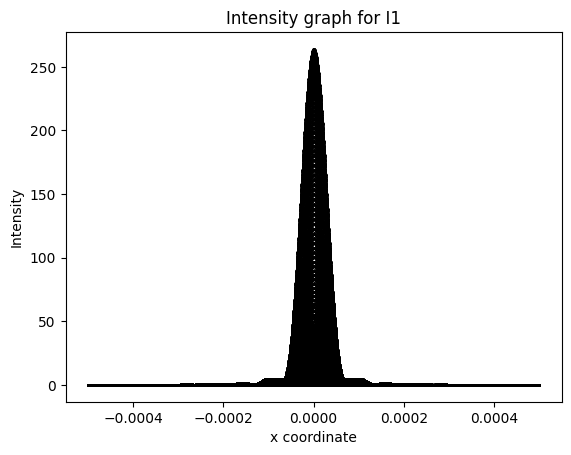

In [ ]:
# plotting intensity graph for x and y
plt.plot(xv, I1,'ko', markersize = 0.5, ls = 'none')
plt.title("Intensity graph for I1 for y-coordinates")
plt.xlabel("x coordinate")
plt.ylabel("Intensity")

Text(0, 0.5, 'Intensity')

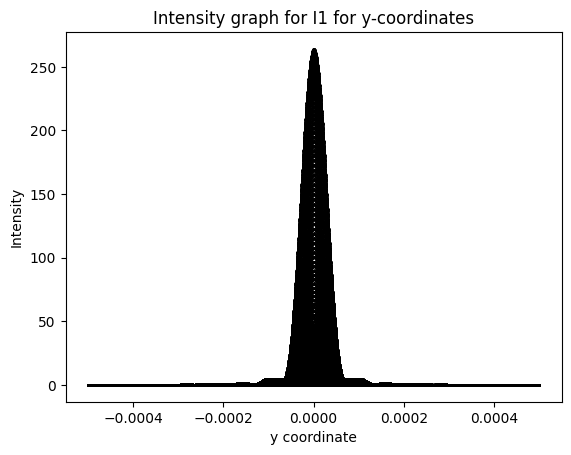

In [61]:
plt.plot(yv, I1,'ko', markersize = 0.5, ls = 'none')
plt.title("Intensity graph for I1 for y-coordinates")
plt.xlabel("y coordinate")
plt.ylabel("Intensity")

In [ ]:
# progogating through space

fx = fftfreq(num_pixels, pix_size)
fy = fftfreq(num_pixels, pix_size)

FX, FY = np.meshgrid(fx, fy)

H = 1 # transfer function - will edit after finding correct form.
u_out = u1*H


Text(0, 0.5, 'y coordinates (mm)')

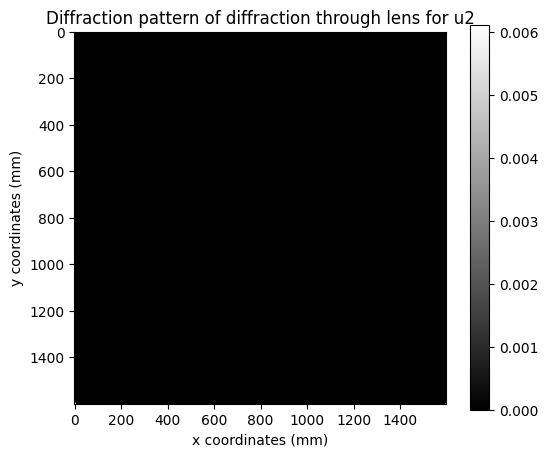

In [63]:
# propagating through second lens

u2_fft = ifft2(u_out)
u2 = fftshift(u2_fft)

#u2 = u2.astype(float)

I2 = (1/(wvl*f))**2*np.abs(u2)**2
plt.figure(figsize=(6,5))
plt.imshow(I2, cmap='gray')
#plt.clim(0, 1)
plt.colorbar()
plt.title("Diffraction pattern of diffraction through lens for u2")
plt.xlabel("x coordinates (mm)")
plt.ylabel("y coordinates (mm)")

Text(0, 0.5, 'Intensity')

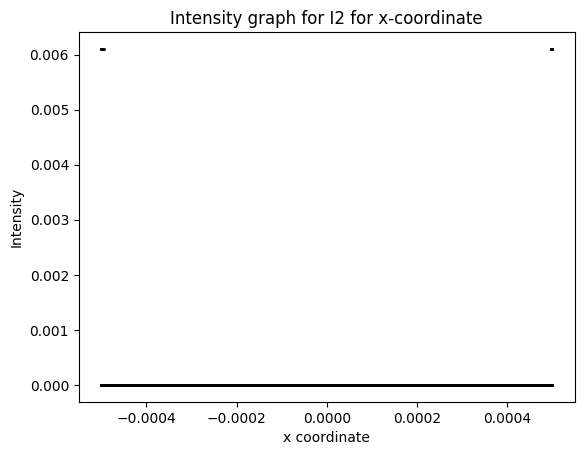

In [64]:
plt.plot(xv, I2, 'ko', markersize = 0.5, ls = 'none')
plt.title("Intensity graph for I2 for x-coordinate")
plt.xlabel("x coordinate")
plt.ylabel("Intensity")

Text(0, 0.5, 'Intensity')

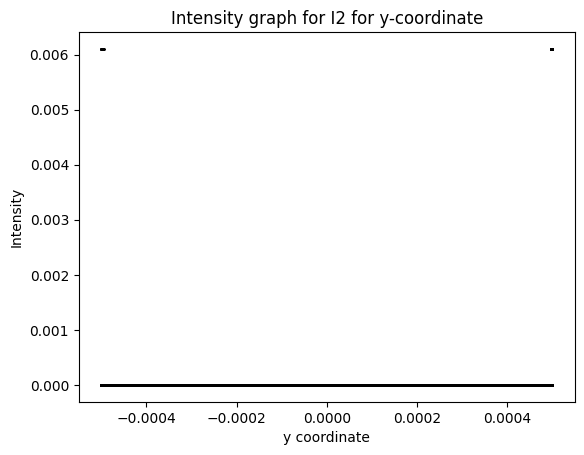

In [65]:
plt.plot(yv, I2, 'ko', markersize = 0.5, ls = 'none')
plt.title("Intensity graph for I2 for y-coordinate")
plt.xlabel("y coordinate")
plt.ylabel("Intensity")

**Notes:**

The Huygens-Fresnel principle is
$$u_1(x_1, y_1) = \int \int^\infty_{-\infty} u_0(x_0, y_0) \frac{z_{01}}{j\lambda r_{01}} \frac{e^{jkr_{01}}}{r_{01}} dx_0 dy_0$$
where
$$r_{01} = \sqrt{(x_1 - x_0)^2 + (y_1 - y0)^2 + (z_1 - z_0)^2}$$

Due to exponent being nonlinear, it is difficult to computate. As such, when in Fraunhofer zone, we can approximate it as
$$u(x_1, y_1) = \frac{e^{jkz_{01}}}{j\lambda z_{01}} \exp(j\frac{\pi}{\lambda z_{12}}(x_1^2 + y_1^2)) \int \int^\infty_{-\infty} u_0(x_0, y_0)e^{-j\pi(x_1 \xi + y_1 \eta)} dx_0 dy_0$$
where $\xi = \frac{x_1}{\lambda z_{01}}$ and $\eta = \frac{y_1}{\lambda z_{01}}$
 The intensity is
 $$I(x_1,y_1) = \left(\frac{1}{\lambda z_{01}}\right)^2 |F(u(x_0,y_0))|^2$$

A lens applies transformation:
$$t_{lens}(\textbf{r}) = A \exp(-\frac{i\pi r^2}{\lambda f}) t_{ap}(\textbf{r})$$
with complex constant $A$.

When $A = 1$, with $z = -f$ to $z=+f$,
$$u_2(\textbf{r}_2) = \frac{e^{ik2f}}{i\lambda f} F(u_1(\textbf{r}_1))|_{\textbf{p}=\frac{\textbf{r}_f}{\lambda f}} = \frac{e^{ik2f}}{i\lambda f} U_1(\frac{\textbf{r}_2}{\lambda f}).$$

The object's Fourier domain can be modified by placing filter at $z = z_2$:
$$u_2(\textbf{r}_2)=\frac{e^{ik2f}}{i\lambda f} U_1(\frac{\textbf{r}_2}{\lambda f})t_{filter}(\textbf{r}_2).$$

We can simulate a 4f optical system by:
1. Establishing shape of object.
2. Propagate the beam through the first lens and use Fourier transform.
3. Propagate the beam through space using transfer function.
4. Propogate beam through second lens and use inverse Fourier transform.
5. Visualise image.